In [1]:
import gpflow
import numpy as np

In [2]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
plt = matplotlib.pyplot

In [3]:
#make a dataset with two outputs, correlated, heavy-tail noise. One has more noise than the other.
X1 = np.random.rand(100, 1)
X2 = np.random.rand(50, 1) * 0.5
Y1 = np.sin(6*X1) + np.random.standard_t(3, X1.shape)*0.03
Y2 = np.sin(6*X2+ 0.7) + np.random.standard_t(3, X2.shape)*0.1

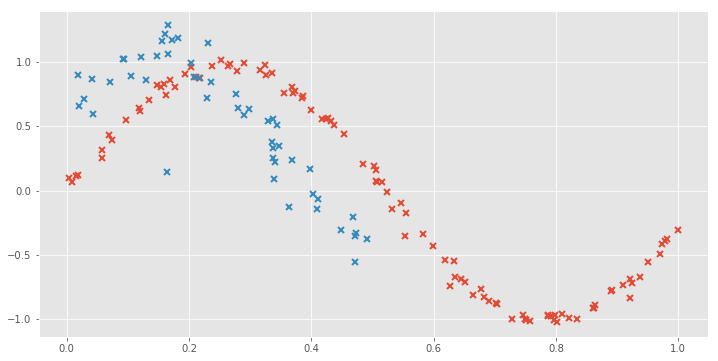

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(X1, Y1, 'x', mew=2)
plt.plot(X2, Y2, 'x', mew=2)
#plt.ylim(-2, 2)

In [5]:
# build a variational model
lik = gpflow.likelihoods.SwitchedLikelihood([gpflow.likelihoods.StudentT(), gpflow.likelihoods.StudentT()])
k1 = gpflow.kernels.Matern32(1)
coreg = gpflow.kernels.Coregion(1, output_dim=2, rank=1, active_dims=[1])
kern = k1 * coreg
X_augmented = np.vstack((np.hstack((X1, np.zeros_like(X1))), np.hstack((X2, np.ones_like(X2)))))
Y_augmented = np.vstack((np.hstack((Y1, np.zeros_like(X1))), np.hstack((Y2, np.ones_like(X2)))))

#m = gpflow.models.VGP(X_augmented, Y_augmented, kern=kern, likelihood=lik, num_latent=1)
m = gpflow.models.SVGP(X_augmented, Y_augmented,
                     kern=kern, likelihood=lik, num_latent=1,
                     Z=X_augmented[::3].copy())

In [6]:
m.compile()
gpflow.train.ScipyOptimizer().minimize(m)


AttributeError: 'NoneType' object has no attribute 'variational_expectations'

In [ ]:
plt.figure(figsize=(12, 6))
xtest = np.linspace(0, 1, 100)[:,None]
line, = plt.plot(X1, Y1, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.zeros_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

line, = plt.plot(X2, Y2, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.ones_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

plt.ylim(-2, 2)

In [ ]:
m.kern.coregion.W = np.random.randn(2, 1)

In [ ]:
m.optimize()

In [ ]:
plt.figure(figsize=(12, 6))
xtest = np.linspace(0, 1, 100)[:,None]
line, = plt.plot(X1, Y1, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.zeros_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

line, = plt.plot(X2, Y2, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.ones_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

plt.ylim(-2, 2)

In [ ]:
m.kern

In [ ]:
debug

> /Users/jameshensman/work/gpflow_open/gpflow/likelihoods.py(547)<listcomp>()
    545 
    546         # apply the likelihood-function to each section of the data
--> 547         funcs = [getattr(lik, func_name) for lik in self.likelihood_list]
    548         results = [f(*args_i) for f, args_i in zip(funcs, args)]
    549 

ipdb> self.likelihood_list
*** NameError: name 'self' is not defined
ipdb> u
> /Users/jameshensman/work/gpflow_open/gpflow/likelihoods.py(547)_partition_and_stitch()
    545 
    546         # apply the likelihood-function to each section of the data
--> 547         funcs = [getattr(lik, func_name) for lik in self.likelihood_list]
    548         results = [f(*args_i) for f, args_i in zip(funcs, args)]
    549 

ipdb> self.likelihood_list
ipdb> self.likelihood_list[0]
ipdb> [l for l in self.likelihood_list]
[<gpflow.likelihoods.StudentT object at 0x10f0cb518>, <gpflow.likelihoods.StudentT object at 0x10f0cb550>]
ipdb> func_name
'variational_expectations'
ipdb> l.v